# 2D nearest neighbor chain

Optimatrix on 2D grid optimises matrix with elements $1/r_{ij}$.

Notice, results can not be different compare to the interaction matrix $\sim 1/r_{ij}^6$


In [1]:
import pulser
import numpy as np
import helpers as helpers

import emu_mps.optimatrix as optimatrix

In [2]:
def two_dim_lattice(M: int, N: int) -> np.ndarray:
    coords = np.array(
        [
            (i, j) for j in range(M) for i in range(N) 
        ]
    )


    def rotate(theta, vector):
        rotation = np.array([
            [np.cos(theta), -np.sin(theta)],
            [np.sin(theta),  np.cos(theta)]
        ])
        return rotation @ vector
    
    
    rotated_coords = np.array([rotate(0, coord) for coord in coords])

    return pulser.Register.from_coordinates(rotated_coords, center = True)


chain = two_dim_lattice(5, 5)

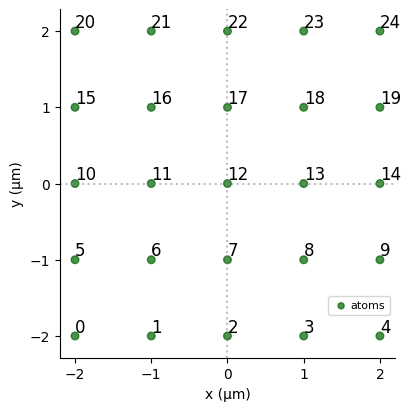

In [3]:
chain.draw()

optimal permutation is
 tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24])


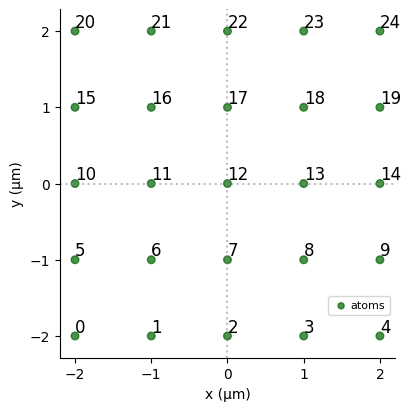

In [4]:
interactions = helpers.reciprocal_dist_matrix(chain)
optimal_permutation = optimatrix.minimize_bandwidth(interactions)
print("optimal permutation is\n", optimal_permutation)
chain = helpers.permute_sequence_registers(chain, optimal_permutation)

chain.draw()

optimal permutation is
 tensor([ 1, 11,  4, 23,  9, 24, 18,  2,  7,  8, 19, 21, 17, 10, 14, 12, 13, 15,
         6,  5,  3, 22, 20, 16,  0])


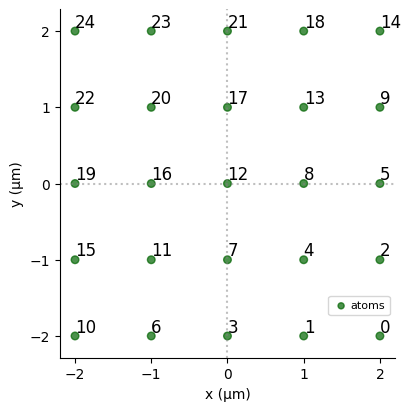

In [5]:
# Second optimisation with shuffling

chain = helpers.shuffle_qubits(chain)


interactions = helpers.reciprocal_dist_matrix(chain)
optimal_permutation = optimatrix.minimize_bandwidth(interactions)
print("optimal permutation is\n", optimal_permutation)
chain = helpers.permute_sequence_registers(chain, optimal_permutation)

chain.draw()